In [1]:
# This code is submitted by ABHINAV BANERJEE

In [2]:
import pandas as pd

df = pd.read_csv('Task-1-MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06,263.750000,267.989990,262.399994,266.209991,263.661377,23824400
1,2022-07-07,265.119995,269.059998,265.019989,268.399994,265.830383,20859900
2,2022-07-08,264.790009,268.100006,263.290009,267.660004,265.097504,19658800
3,2022-07-11,265.649994,266.529999,262.179993,264.510010,261.977661,19455200
4,2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500
...,...,...,...,...,...,...,...
246,2023-06-28,334.660004,337.980011,333.809998,335.850006,335.850006,20259500
247,2023-06-29,334.709991,336.109985,332.619995,335.049988,335.049988,16997000
248,2023-06-30,337.750000,342.730011,337.200012,340.540009,340.540009,26823800
249,2023-07-03,339.190002,340.899994,336.570007,337.989990,337.989990,12508700


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-07-06,266.209991
1,2022-07-07,268.399994
2,2022-07-08,267.660004
3,2022-07-11,264.510010
4,2022-07-12,253.669998
...,...,...
246,2023-06-28,335.850006
247,2023-06-29,335.049988
248,2023-06-30,340.540009
249,2023-07-03,337.989990


In [5]:
df['Date']

0      2022-07-06
1      2022-07-07
2      2022-07-08
3      2022-07-11
4      2022-07-12
          ...    
246    2023-06-28
247    2023-06-29
248    2023-06-30
249    2023-07-03
250    2023-07-05
Name: Date, Length: 251, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [7]:
df

,Date,Close
0,2022-07-06,266.209991
1,2022-07-07,268.399994
2,2022-07-08,267.660004
3,2022-07-11,264.510010
4,2022-07-12,253.669998
...,...,...
246,2023-06-28,335.850006
247,2023-06-29,335.049988
248,2023-06-30,340.540009
249,2023-07-03,337.989990


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\HP\AppData\Local\Temp\ipykernel_26628\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-07-06
1     2022-07-07
2     2022-07-08
3     2022-07-11
4     2022-07-12
         ...    
246   2023-06-28
247   2023-06-29
248   2023-06-30
249   2023-07-03
250   2023-07-05
Name: Date, Length: 251, dtype: datetime64[ns]

In [9]:
df.index = df.pop('Date')
df

,Close
Date,
2022-07-06,266.209991
2022-07-07,268.399994
2022-07-08,267.660004
2022-07-11,264.510010
2022-07-12,253.669998
...,...
2023-06-28,335.850006
2023-06-29,335.049988
2023-06-30,340.540009


Text(0, 0.5, 'Price-->')

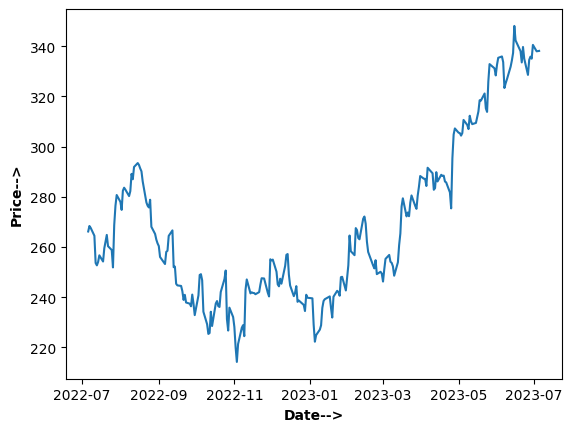

In [32]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-07-11', 
                                '2023-07-05', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-07-11,266.209991,268.399994,267.660004,264.510010
1,2022-07-12,268.399994,267.660004,264.510010,253.669998
2,2022-07-13,267.660004,264.510010,253.669998,252.720001
3,2022-07-14,264.510010,253.669998,252.720001,254.080002
4,2022-07-15,253.669998,252.720001,254.080002,256.720001
...,...,...,...,...,...
243,2023-06-28,335.019989,328.600006,334.570007,335.850006
244,2023-06-29,328.600006,334.570007,335.850006,335.049988
245,2023-06-30,334.570007,335.850006,335.049988,340.540009
246,2023-07-03,335.850006,335.049988,340.540009,337.989990


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

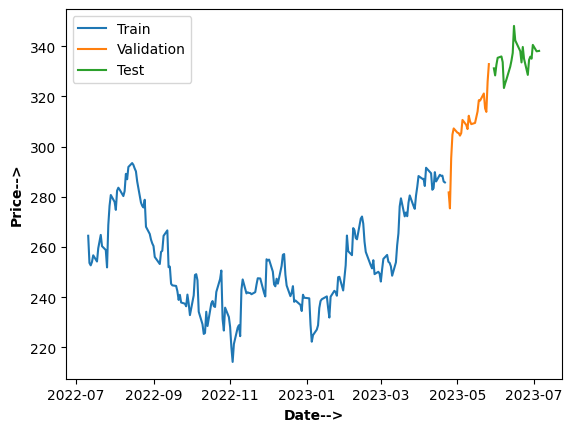

In [26]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 6s 218ms/step - loss: 65437.9688 - mean_absolute_error: 255.0983 - val_loss: 95340.3594 - val_mean_absolute_error: 308.5500
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 65170.5977 - mean_absolute_error: 254.5747 - val_loss: 95002.6875 - val_mean_absolute_error: 308.0023
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 64867.3555 - mean_absolute_error: 253.9780 - val_loss: 94572.9297 - val_mean_absolute_error: 307.3039
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 64483.9297 - mean_absolute_error: 253.2213 - val_loss: 94058.1562 - val_mean_absolute_error: 306.4651
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 64020.4297 - mean_absolute_error: 252.3025 - val_loss: 93388.2578 - val_mean_absolute_error: 305.3702
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 63388.9688 - mean_absolute_error: 251.0499 - val_loss: 92

7/7 [==============================] - 0s 5ms/step


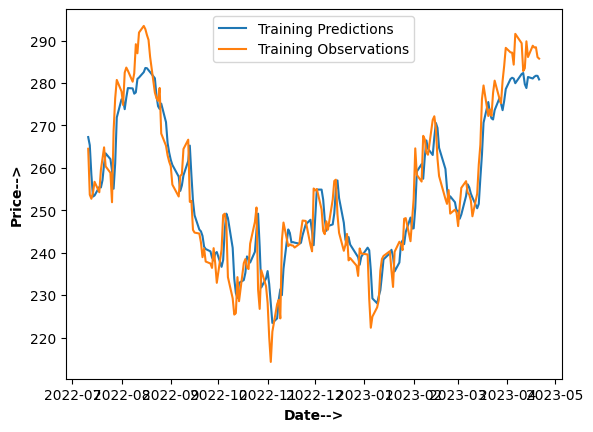

In [27]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 52ms/step


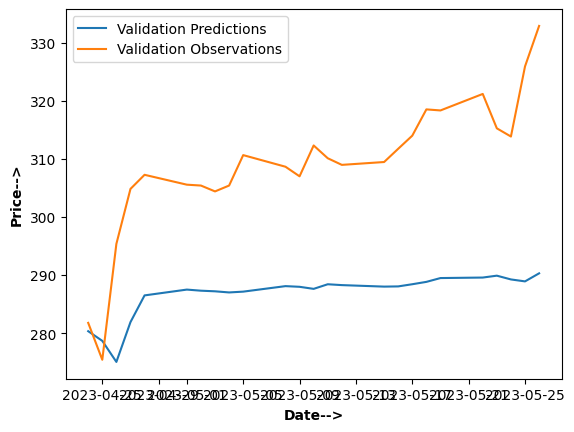

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 52ms/step


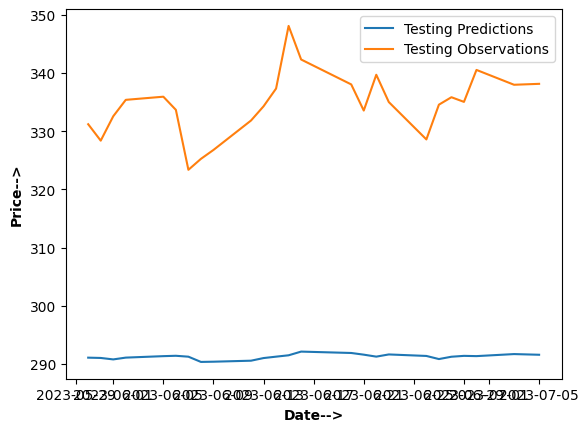

In [29]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')
plt.legend(['Testing Predictions', 'Testing Observations'])

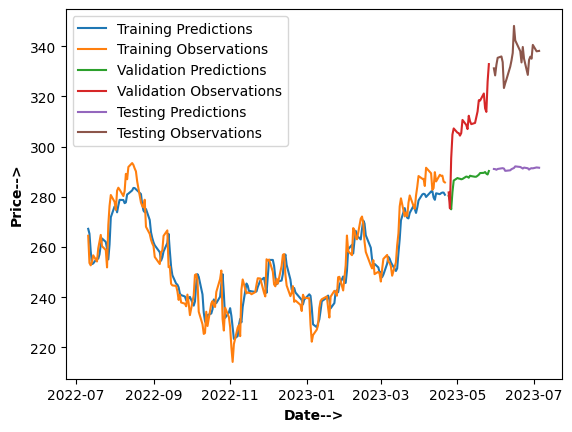

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 40ms/step


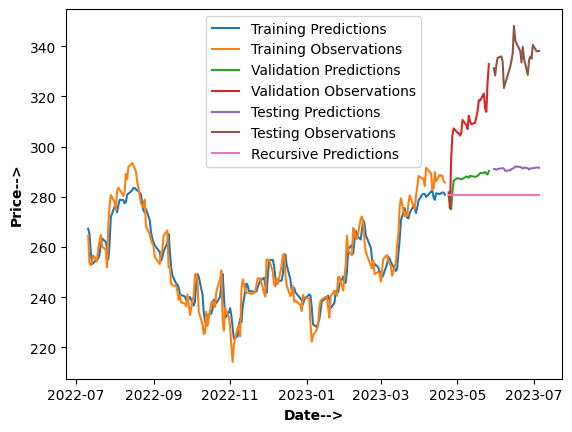

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.xlabel('Date-->',fontweight ='bold')
plt.ylabel('Price-->',fontweight ='bold')
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

In [21]:
# This code is submitted by ABHINAV BANERJEE